<h1><center> Gender Classification</center></h1>

**Link to dataset**: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset#

# 1. Data Dictionary

**Name of csv file**: gender_classification_v7.csv

Information below is taken from the Kaggle repository linked above. 

This dataset contains **7 features and a label column.**

* long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair"
* forehead_width_cm - This column is in CM's. This is the width of the forehead
* forehead_height_cm - This is the height of the forehead and it's in Cm's
* nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose"
* nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose"
* lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips"
* distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips"
* gender - This is either "Male" or "Female".

# 2. Problem Statement

The assumed problem statement for this dataset is to predict whether a person is male or female based on information about their facial descriptions and details. 

# 3. Exploratory Data Analysis

## 3.1 Importing Necessary Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

## 3.2 Basic Analysis

In [12]:
data = pd.read_csv('gender_classification_v7.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [13]:
data.shape

(5001, 8)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [15]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [16]:
data[data.duplicated()]

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
59,1,14.1,5.9,0,0,0,0,Female
66,1,14.2,6.2,0,0,0,0,Female
175,1,12.7,5.7,1,1,1,1,Male
230,1,12.9,5.1,0,0,0,0,Female
261,1,13.0,6.2,1,1,1,1,Male
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


**Inferences**:
- Dataset has 5001 rows and 8 columns
- Gender is the target column and is of object datatype
- There seem to be no null values in this dataset
- There are duplicates in this dataset, but given the nature and simplicity of the data, these duplicates are required

### 3.2.1 Unique Categories in Each Column

In [19]:
for i in data.columns:
    if i != 'forehead_width_cm' and i != 'forehead_height_cm':
        print(f'Unique values in Column {i}:',data[i].unique())
        print('************************')

Unique values in Column long_hair: [1 0]
************************
Unique values in Column nose_wide: [1 0]
************************
Unique values in Column nose_long: [0 1]
************************
Unique values in Column lips_thin: [1 0]
************************
Unique values in Column distance_nose_to_lip_long: [1 0]
************************
Unique values in Column gender: ['Male' 'Female']
************************


## 3.3 Presence of Outliers and Anomalies

Method to detect outliers: IQR

* **IQR**: Q3 - Q1
* **Values in upper whisker**: Q3 + (1.5*IQR)
* **Values in lower whisker**: Q1 - (1.5*IQR)
* **Outliers** are values that lie beyond the scope of upper or lower whiskers

In [22]:
#Splitting the data into numerical and categorical columns
num = ['forehead_width_cm','forehead_height_cm']
cat = data.drop(['forehead_width_cm','forehead_height_cm'],axis=1).columns.to_list()

In [23]:
num

['forehead_width_cm', 'forehead_height_cm']

In [24]:
cat

['long_hair',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long',
 'gender']

In [25]:
q3 = data[num].quantile(0.75)
q1 = data[num].quantile(0.25)

iqr = q3 - q1

In [26]:
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

In [27]:
#Outlier rows in data
data[((data[num] < lower) | (data[num] > upper)).any(axis=1)]

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender


No outliers present in data. 

## 3.4 Basic Statistical Measures

### 3.4.1 Skewness and Kurtosis

In [31]:
for i in num:
    print(f'Skewness of {i} :',data[i].skew())
    print(f'Kurtosis of {i} :',data[i].kurt())

Skewness of forehead_width_cm : 0.24224150525048402
Kurtosis of forehead_width_cm : -0.9305963274171236
Skewness of forehead_height_cm : 0.250738669931786
Kurtosis of forehead_height_cm : -0.848889469131294


In [32]:
print('Correlation between numerical variables')
data[num].corr()

Correlation between numerical variables


,forehead_width_cm,forehead_height_cm
forehead_width_cm,1.000000,0.088596
forehead_height_cm,0.088596,1.000000


In [33]:
print('Covariance between numerical variables')
data[num].cov()

Covariance between numerical variables


,forehead_width_cm,forehead_height_cm
forehead_width_cm,1.225733,0.053092
forehead_height_cm,0.053092,0.292971


In [34]:
for i in cat:
    print('********************************************')
    print(f'Percentage of variables in column {i}:',data[i].value_counts(normalize=True)*100)

********************************************
Percentage of variables in column long_hair: long_hair
1    86.962607
0    13.037393
Name: proportion, dtype: float64
********************************************
Percentage of variables in column nose_wide: nose_wide
0    50.609878
1    49.390122
Name: proportion, dtype: float64
********************************************
Percentage of variables in column nose_long: nose_long
1    50.789842
0    49.210158
Name: proportion, dtype: float64
********************************************
Percentage of variables in column lips_thin: lips_thin
0    50.689862
1    49.310138
Name: proportion, dtype: float64
********************************************
Percentage of variables in column distance_nose_to_lip_long: distance_nose_to_lip_long
0    50.109978
1    49.890022
Name: proportion, dtype: float64
********************************************
Percentage of variables in column gender: gender
Female    50.009998
Male      49.990002
Name: proportion, d

**Inference**:
- Skewness and kurtosis in numerical variables seem to be minimum
- Most categorical variables, including the target variable, appear to be balanced -- This is an ideal state for classification, where we need the target variable to be ideally somewhat balanced

## 3.5 Visualizations

In [37]:
#Importing libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Fixing figure size for all visualizations in this entire notebook
plt.rcParams['figure.figsize']=[15,10]

### 3.5.1 Univariate Analysis

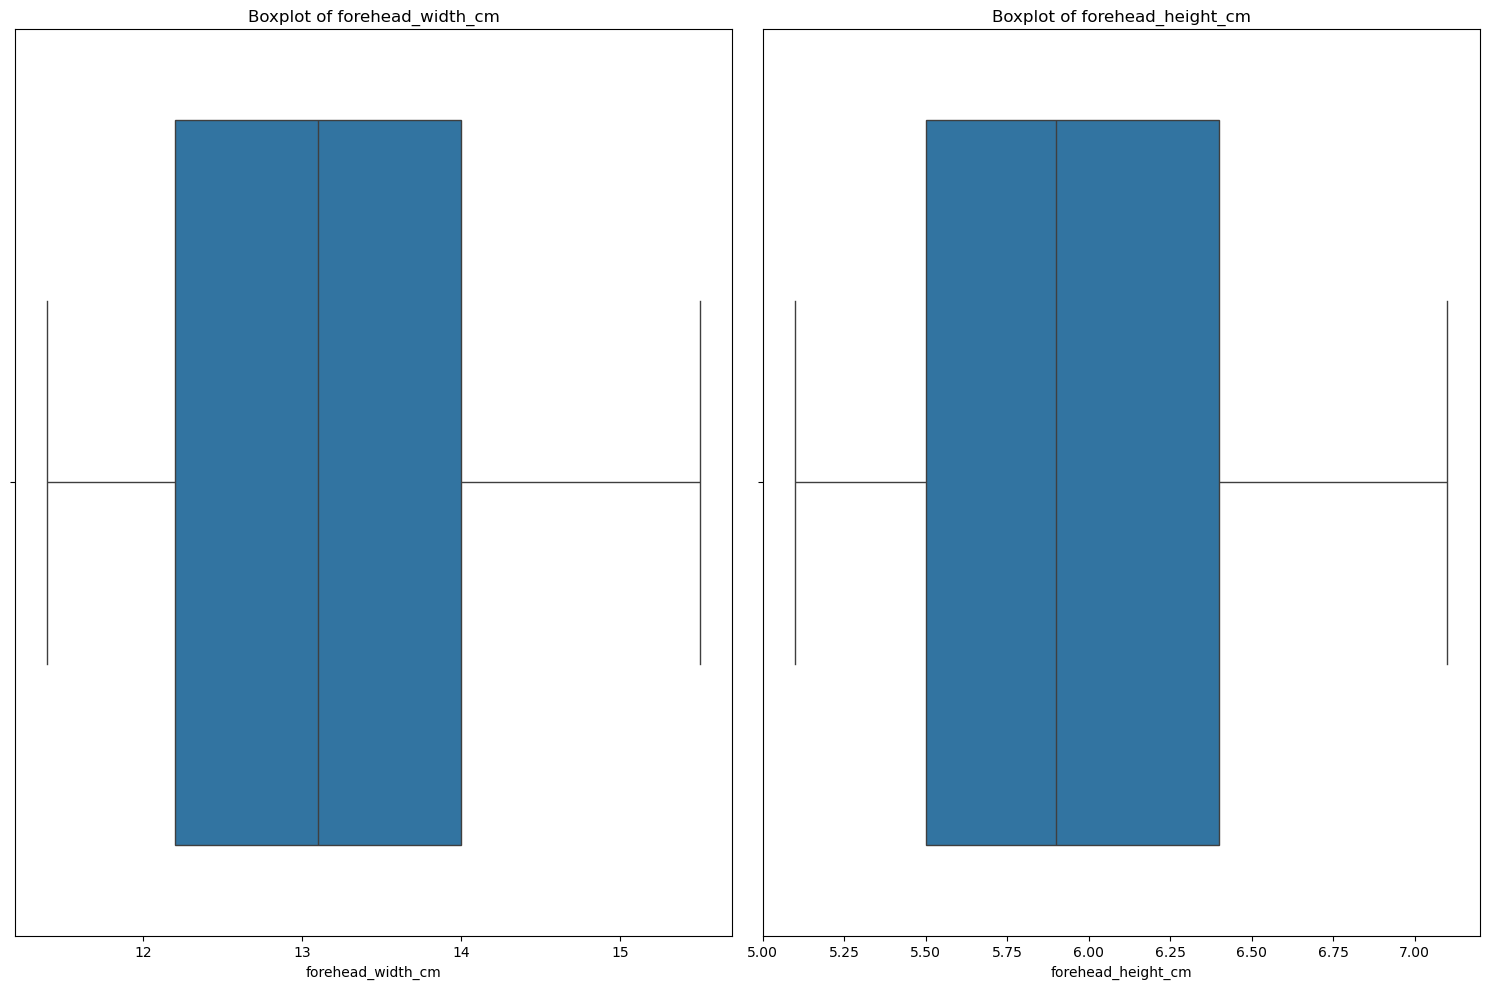

In [40]:
t = 1
for i in num:
    plt.subplot(1,2,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Boxplot of {i}')
    t+=1
plt.tight_layout()
plt.show()

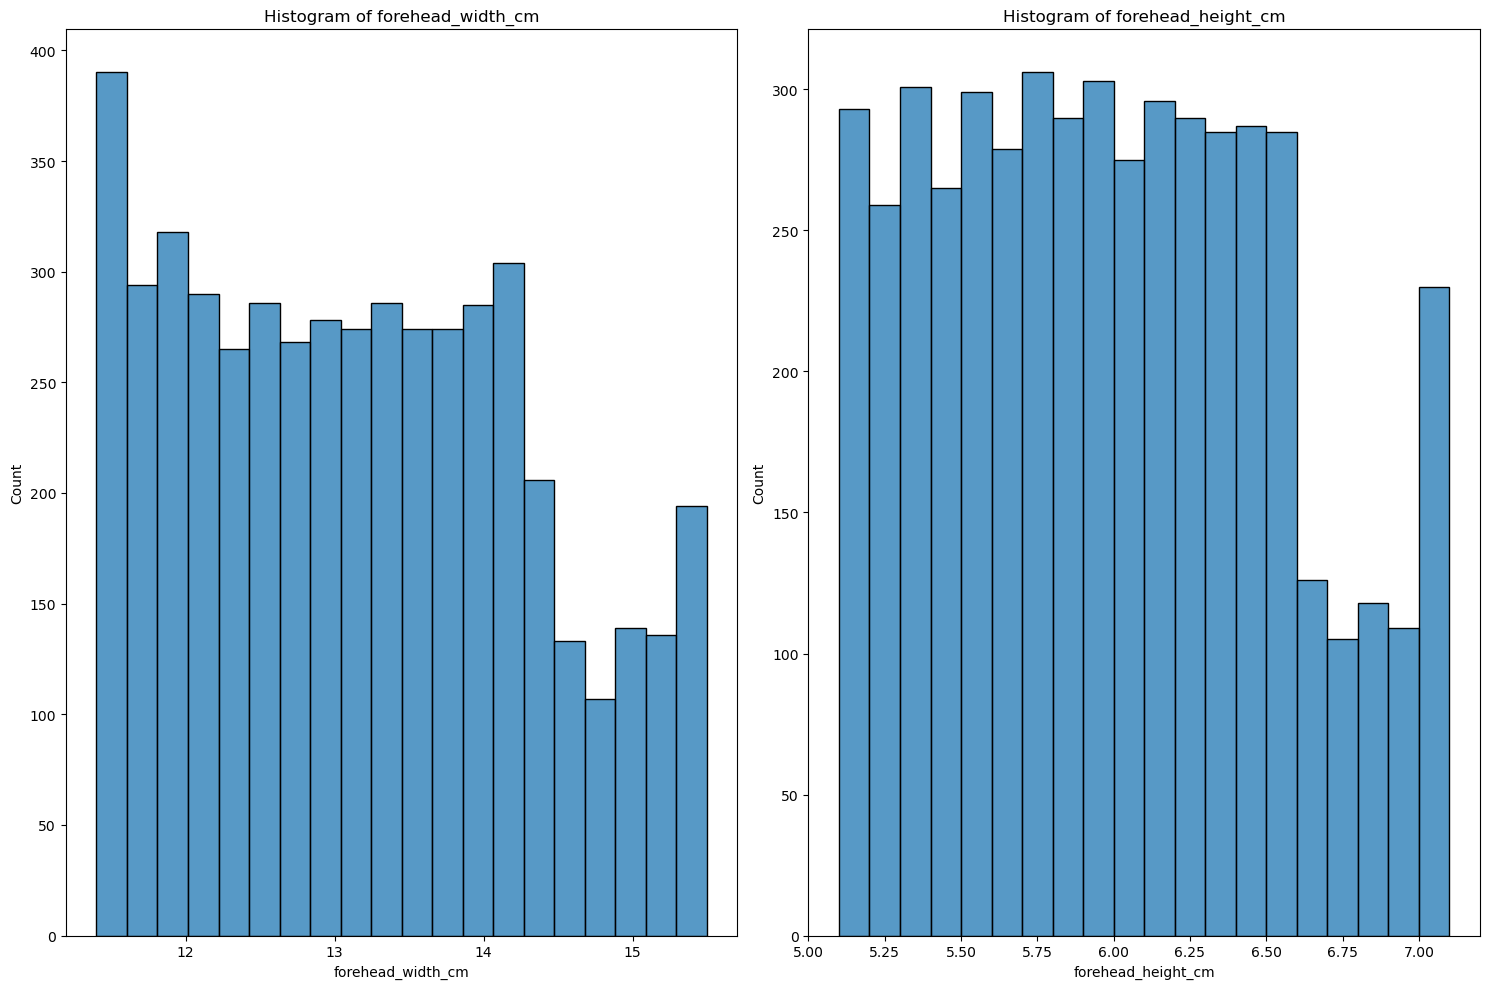

In [41]:
t = 1
for i in num:
    plt.subplot(1,2,t)
    sns.histplot(data=data,x=i)
    plt.title(f'Histogram of {i}')
    t+=1
plt.tight_layout()
plt.show()

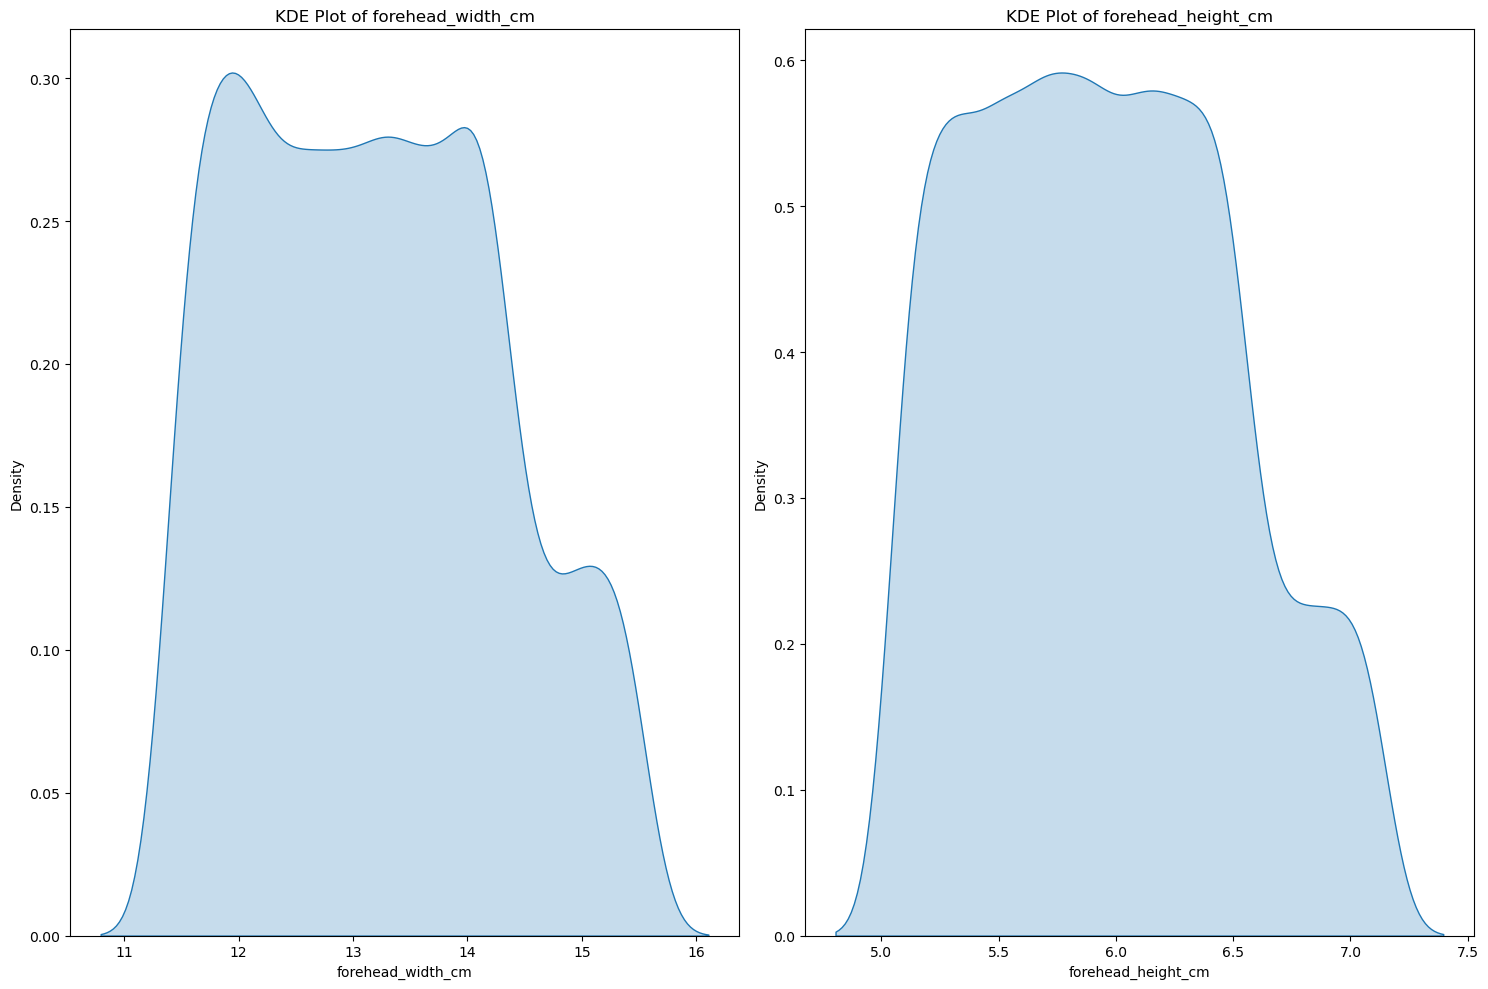

In [42]:
t = 1
for i in num:
    plt.subplot(1,2,t)
    sns.kdeplot(data=data,x=i,fill=True)
    plt.title(f'KDE Plot of {i}')
    t+=1
plt.tight_layout()
plt.show()

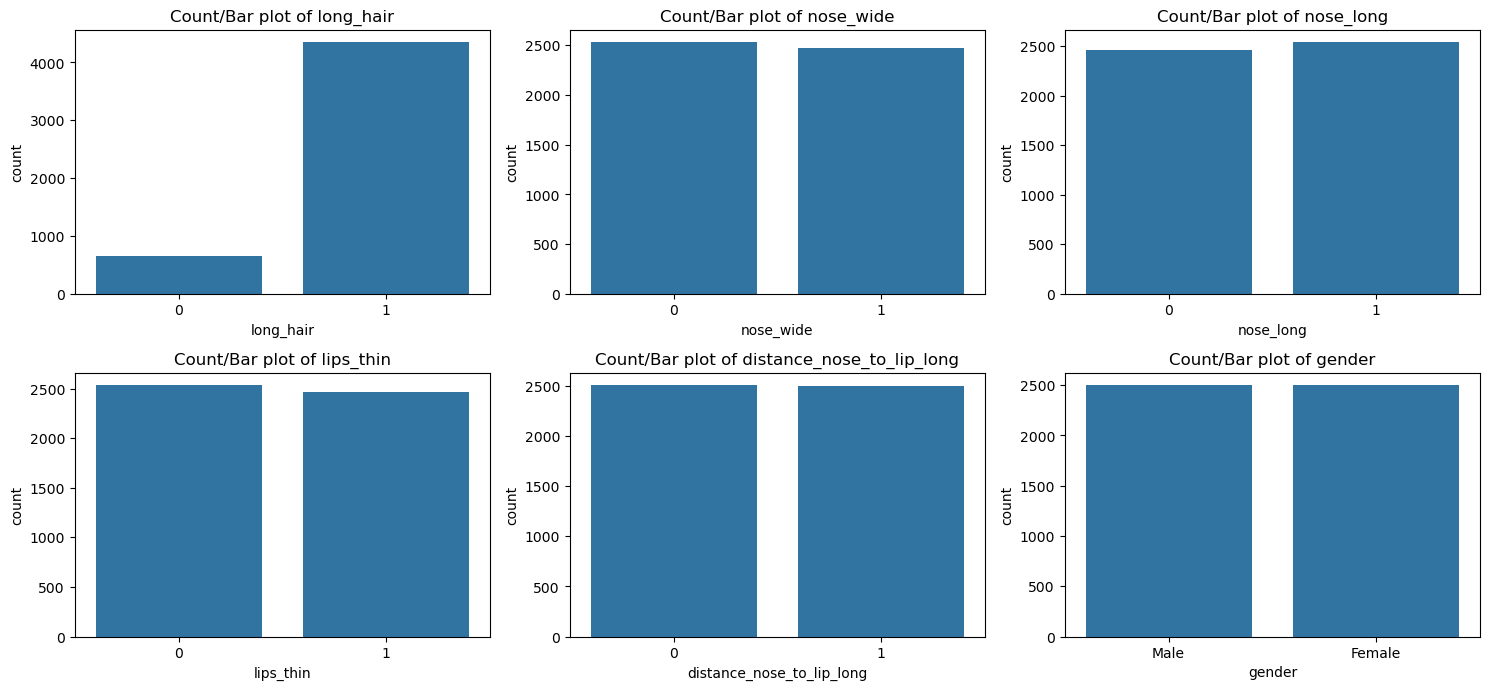

In [43]:
t = 1
for i in cat:
    plt.subplot(3,3,t)
    sns.countplot(data=data,x=i)
    plt.title(f'Count/Bar plot of {i}')
    t+=1
plt.tight_layout()
plt.show()

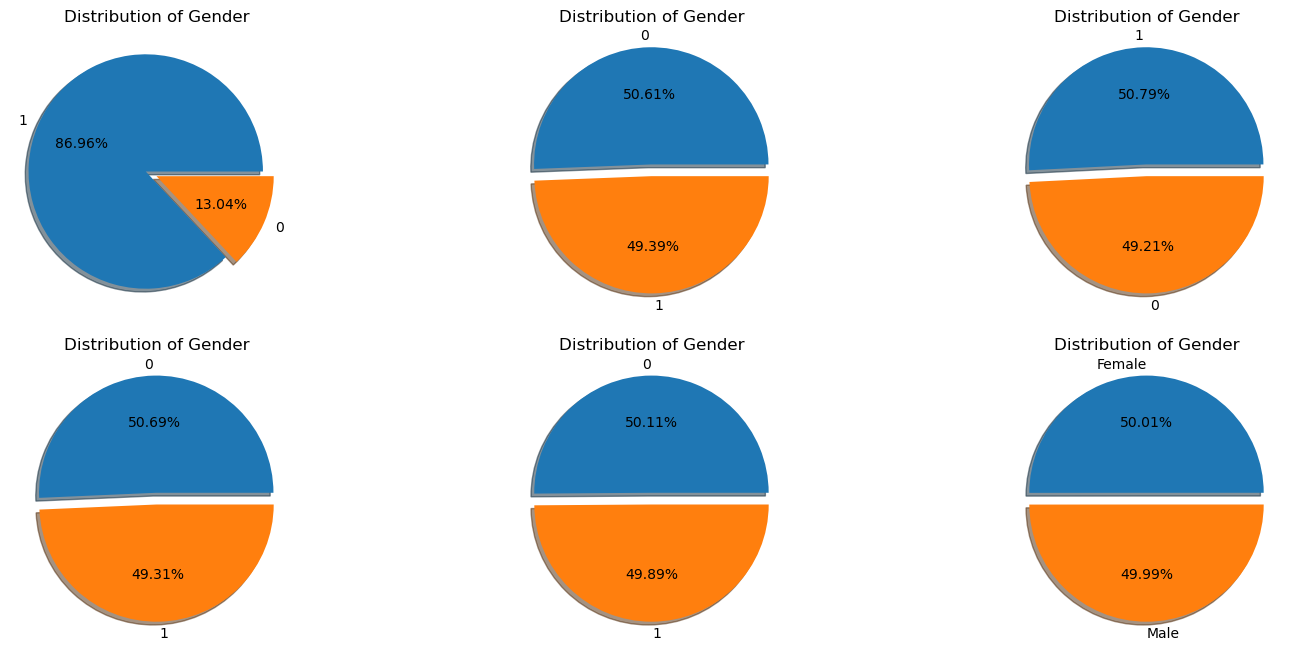

In [44]:
t = 1
for i in cat:
    plt.subplot(3,3,t)
    plt.pie(data[i].value_counts(),
        labels=data[i].value_counts().index,
        autopct='%.2f%%',
        shadow=True,
        explode=[0.1, 0]) 
    plt.title('Distribution of Gender')
    t+=1
plt.tight_layout()
plt.show()

### 3.5.2 Bivariate Analysis

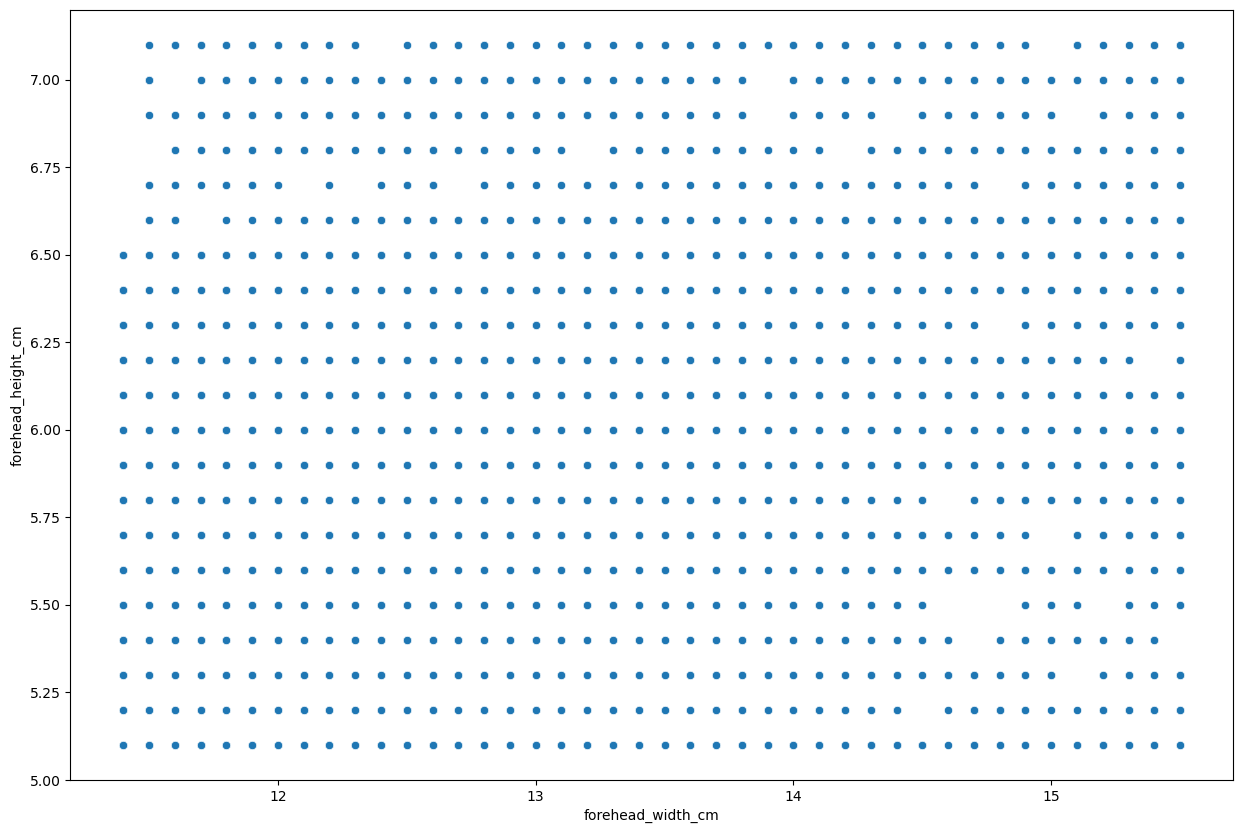

In [46]:
sns.scatterplot(data=data,y='forehead_height_cm',x='forehead_width_cm')
plt.show()

**Inference**: No clear correlation between the two numeric variables

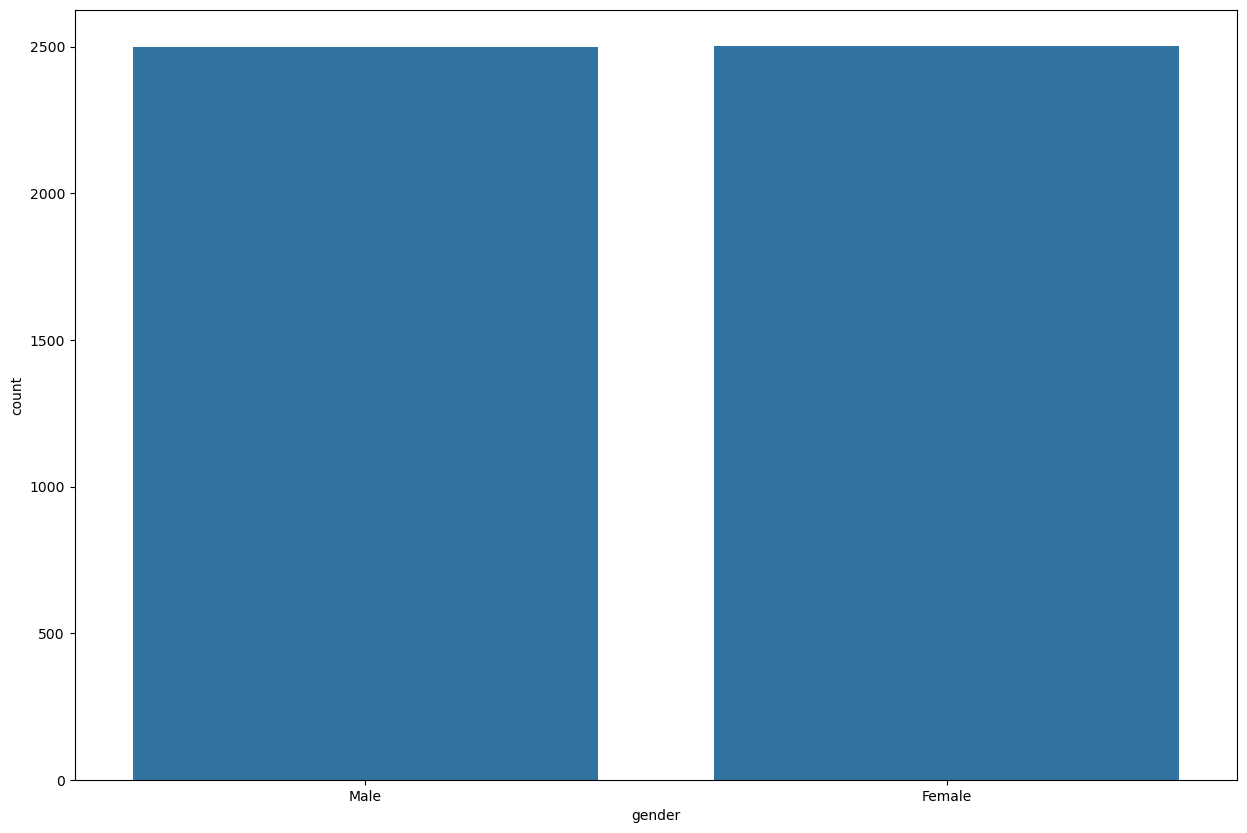

In [48]:
sns.countplot(data=data,x=i)
plt.show()

Given the nature of the dataset and the variables (refer data dictionary), there are no more data visualizations that can be done with these variables since most of them have categories 0 and 1. 

### 3.5.3 Multivariate Analysis

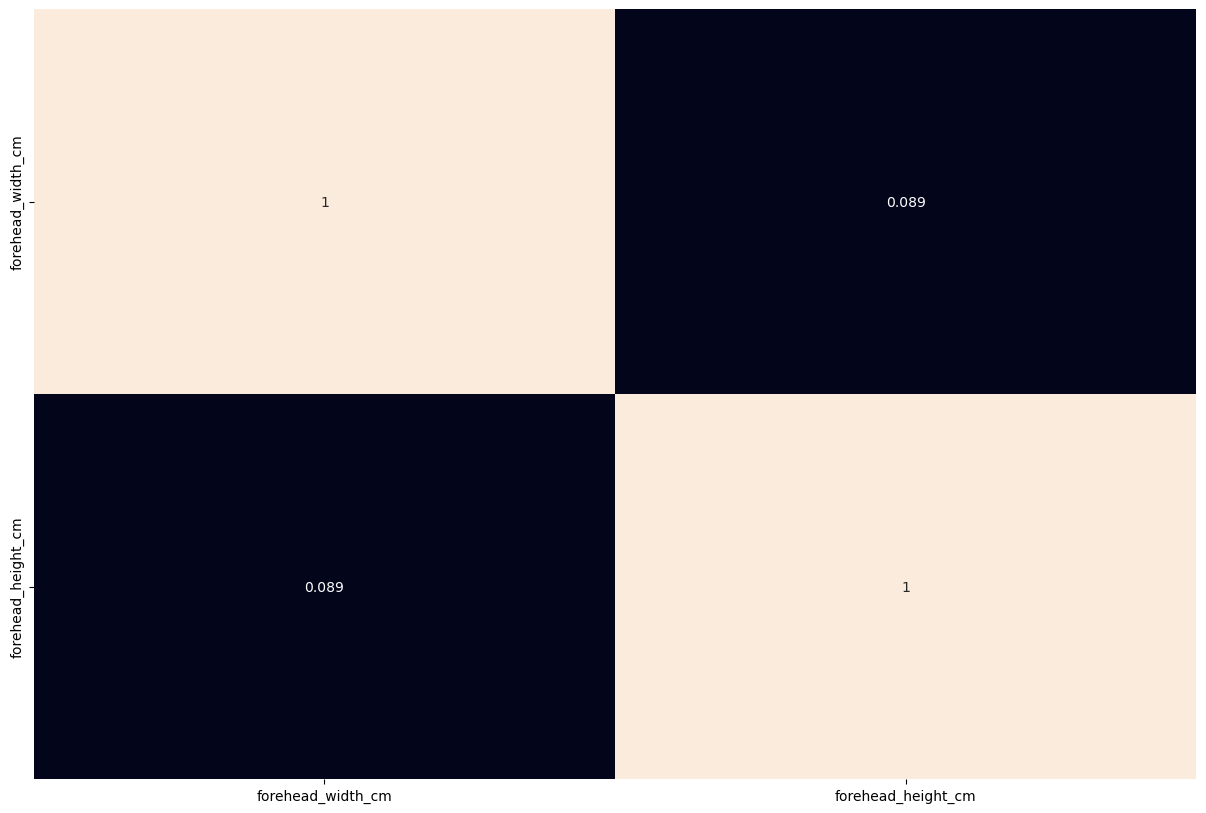

In [51]:
sns.heatmap(data[num].corr(),annot=True,cbar=False)
plt.show()

Just to see how these variables change, I will include the other columns too. Except the target.

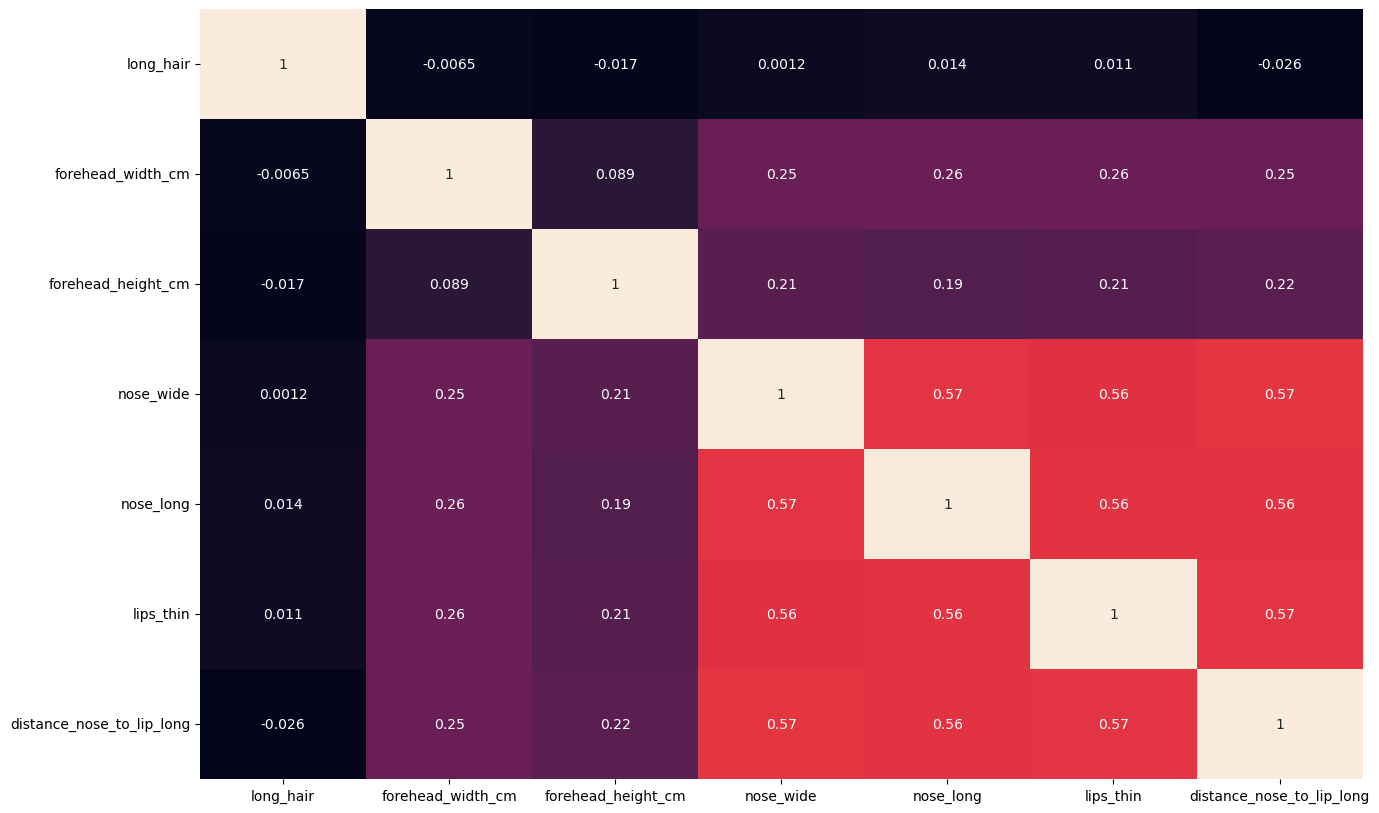

In [53]:
allnum = data.select_dtypes(exclude=object).columns.to_list()

sns.heatmap(data[allnum].corr(),annot=True,cbar=False)
plt.show()

Given the simplicity of the dataset and the domain, these are all the visualizations that I am choosing to generate with these columns. 

# 4. Data Preprocessing

Steps under data preprocessing:
- Scaling (preferrably done after train_test_split)
- Encoding
- Transformation (I am choosing not to transform variables since the numerical variables are not extremely skewed)

## 4.1 Encoding the Categorical Variable

Here, when I say categorical variable, I mean those variables that are not numeric in nature when prompted with .info()

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


We will be encoding the target variable gender.

In [61]:
df = pd.get_dummies(data=data, columns=['gender'],drop_first=True).astype(int)

In [62]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender_Male'],
      dtype='object')

In [63]:
df = df.rename(columns={'gender_Male':'gender'})

In [64]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

We will be splitting this df data into training and testing now.

## 4.2 Train-Test Split

We already know that the target variable is balanced, but it is mandatory to check even then.

In [68]:
X = df.drop('gender',axis=1)
y = df['gender']

In [69]:
y.value_counts(normalize=True)*100

gender
0    50.009998
1    49.990002
Name: proportion, dtype: float64

Here 0 represents Female and 1 represents class Male in gender. The two classes are balanced.

Onto train-test-split!

In [71]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [72]:
#Now we scale the numerical variables in the data
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
xtrain_sc = s.fit_transform(xtrain)
xtest_sc = s.transform(xtest)

# 5. Model Building 

We are now ready to start model-building. 

These are the different models I am going to try and build to perform the classification task (with some GridSearch for optimal parameters, if required):
- Logit Model (Base Model)
- Logistic Regression
- KNN
- Decision Tree
- Random Forest
- AdaBoost
- GradientBoost
- XGBoost

**Note**:
- Given the simplicity of the dataset, we may obtain the best model at KNN or an earlier model itself
- It is still necessary to create many models to compare accuracy metrics efficiently
- Boosting algorithms may not be required for a simple dataset like this, in normal cases

## 5.1 Logit Model (Base Model)

The logit model uses log of Odds concept. It is a statistical model.

I will be using this as the base model against which we shall compare other models on the basis of accuracy metrics. The logit model has a different way ot splitting the data into train-test split which is unique just for this model.

In [77]:
import statsmodels.api as sm

In [78]:
Xc = sm.add_constant(X)

xctrain, xctest, yctrain, yctest = train_test_split(Xc,y,test_size=0.3,random_state=42)

In [79]:
#Building the Logit/base model
base_model = sm.Logit(yctrain,xctrain).fit()

Optimization terminated successfully.
         Current function value: 0.070460
         Iterations 10


In [80]:
ycpred_prob = base_model.predict(xctest)

This returns probabilities. For the logit model, we must name the predictions based on the threshold value. The usually used threshold is 0.5

In [82]:
ycpred = [0 if x < 0.5 else 1 for x in ycpred_prob]

In [83]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gender   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3492
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                  0.8983
Time:                        20:05:47   Log-Likelihood:                -246.61
converged:                       True   LL-Null:                       -2425.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -20.7971      2.086     -9.968      0.000     -24.886     -16.708
long_hair                    -0.3916      0.351     -1.117      0.264      -1.079       0.296
forehead_width_cm             0.6881      0.112      6.127      0.000       0.468       0.908
forehead_height_cm            0.7636      0.208      3.674      0.000       0.356       1.171
nose_wide                     4.2089      0.294     14.297      0.000       3.632       4.786
nose_long                     4.0868      0.290     14.078      0.000       3.518       4.656
lips_thin                     3.8774      0.283     13.708      0.000       3.323       4.432
distance_nose_to_lip_long     4.3189      0.295     14.629      0.000       3.740       4.898
=============================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Because of the nature of the data, a quasi-seperation is present here. I interpret that this means that the model was unable to identify important features in prediction. I should read up on quasi-seperation seperately and I encourage you to do the same.

Let's examine the accuracy of this model more closely.

Since this is a binary classification problem, I will be using accuracy, f1_score, confusion matrix, and the ROC-AUC score.

In [85]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve

In [86]:
print(confusion_matrix(yctest,ycpred))

[[714  25]
 [ 27 735]]


In [87]:
print(classification_report(yctest,ycpred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       739
           1       0.97      0.96      0.97       762

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [88]:
#ROC-AUC score
print('ROC-AUC score:',roc_auc_score(yctest,ycpred_prob))

ROC-AUC score: 0.9949548762426347


In [89]:
print('Model accuracy:',accuracy_score(yctest,ycpred))

Model accuracy: 0.9653564290473018


This model is giving close to 97 percent accuracy. But it fails to identify variables that are significant to predict gender for this data. This may be because of the data itself, so it's not exactly the model's fault.

## 5.2 Logistic Regression Model

In [92]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()

In [93]:
#We don't need scaled data or the data with the constant added to the X variables here
# so I'm using the split data from the Train-Test Split header
logistic_model = l.fit(xtrain,ytrain)
ypred_logistic = l.predict(xtest)

print('Training accuracy:',l.score(xtrain,ytrain))
print('Test accuracy:',l.score(xtest,ytest))
print('Model accuracy:',accuracy_score(ytest,ypred_logistic))

Training accuracy: 0.9694285714285714
Test accuracy: 0.9653564290473018
Model accuracy: 0.9653564290473018


This is the same accuracy as our Logit model.

## 5.3 KNN - K-Nearest Neighbor

When we work with KNN, it is important that we work with scaled data. We have already scaled the data above (after splitting with train_test_split the first time).

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(xtrain_sc,ytrain)
ypred_knn = knn.predict(xtest_sc)

print('Training accuracy:',knn.score(xtrain_sc,ytrain))
print('Test accuracy:',knn.score(xtest_sc,ytest))
print('Model accuracy:',accuracy_score(ytest,ypred_knn))

Training accuracy: 0.9734285714285714
Test accuracy: 0.9593604263824117
Model accuracy: 0.9593604263824117


The accuracy of KNN is lower than that of our base model and our Logistic Model.

## 5.4 Decision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain,ytrain)
ypred_dt = dt.predict(xtest)

print('Training accuracy:',dt.score(xtrain,ytrain))
print('Test accuracy:',dt.score(xtest,ytest))
print('Model accuracy:',accuracy_score(ytest,ypred_dt))

Training accuracy: 0.9788571428571429
Test accuracy: 0.9600266489007329
Model accuracy: 0.9600266489007329


Decision Tree seems to work better than KNN. 

There are some hyperparameters that can be tuned in a Decision Tree. I am now going to build another model with the criterion as 'entropy' instead of 'gini' (default value in a DecisionTreeClassifier) to see how that performs. 

In [102]:
dt2 = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt2.fit(xtrain,ytrain)
ypred_dt2 = dt2.predict(xtest)

print('Training accuracy:',dt2.score(xtrain,ytrain))
print('Test accuracy:',dt2.score(xtest,ytest))
print('Model accuracy:',accuracy_score(ytest,ypred_dt2))

Training accuracy: 0.9788571428571429
Test accuracy: 0.9600266489007329
Model accuracy: 0.9600266489007329


Not much of a difference. 

Decision trees are prone to overfit, so I just want to look at metrics other than accuracy for the two decision trees.

In [104]:
#For dt (criterion='gini')
print('Training accuracy:',dt.score(xtrain,ytrain))
print('Test accuracy:',dt.score(xtest,ytest))

print('Model accuracy:',accuracy_score(ytest,ypred_dt))

print('F1 Score:',f1_score(ytest,ypred_dt))

print('Confusion Matrix for dt:\n',confusion_matrix(ytest,ypred_dt))

Training accuracy: 0.9788571428571429
Test accuracy: 0.9600266489007329
Model accuracy: 0.9600266489007329
F1 Score: 0.9600532623169108
Confusion Matrix for dt:
 [[720  19]
 [ 41 721]]


In [105]:
#For dt2 (criterion='entropy')
print('Training accuracy:',dt2.score(xtrain,ytrain))
print('Test accuracy:',dt2.score(xtest,ytest))

print('Model accuracy:',accuracy_score(ytest,ypred_dt2))

print('F1 Score:',f1_score(ytest,ypred_dt2))

print('Confusion Matrix for dt:\n',confusion_matrix(ytest,ypred_dt2))

Training accuracy: 0.9788571428571429
Test accuracy: 0.9600266489007329
Model accuracy: 0.9600266489007329
F1 Score: 0.9600532623169108
Confusion Matrix for dt:
 [[720  19]
 [ 41 721]]


Both are identical with respect to the confusion matrix.

With respect to all the models built so far, I don't see underfitting or overfitting happening. I also have an accuracy score of nearly 97 percent from my Logit model and my Logistic Regression model. 

In a scenario like this, we can ideally stop building more models, but I'd like to continue forward with Random Forest and the other algorithms.

Just for fun, I'd like to visualize the decision trees I created!

Plotting Decision Tree dt (criterion=gini)


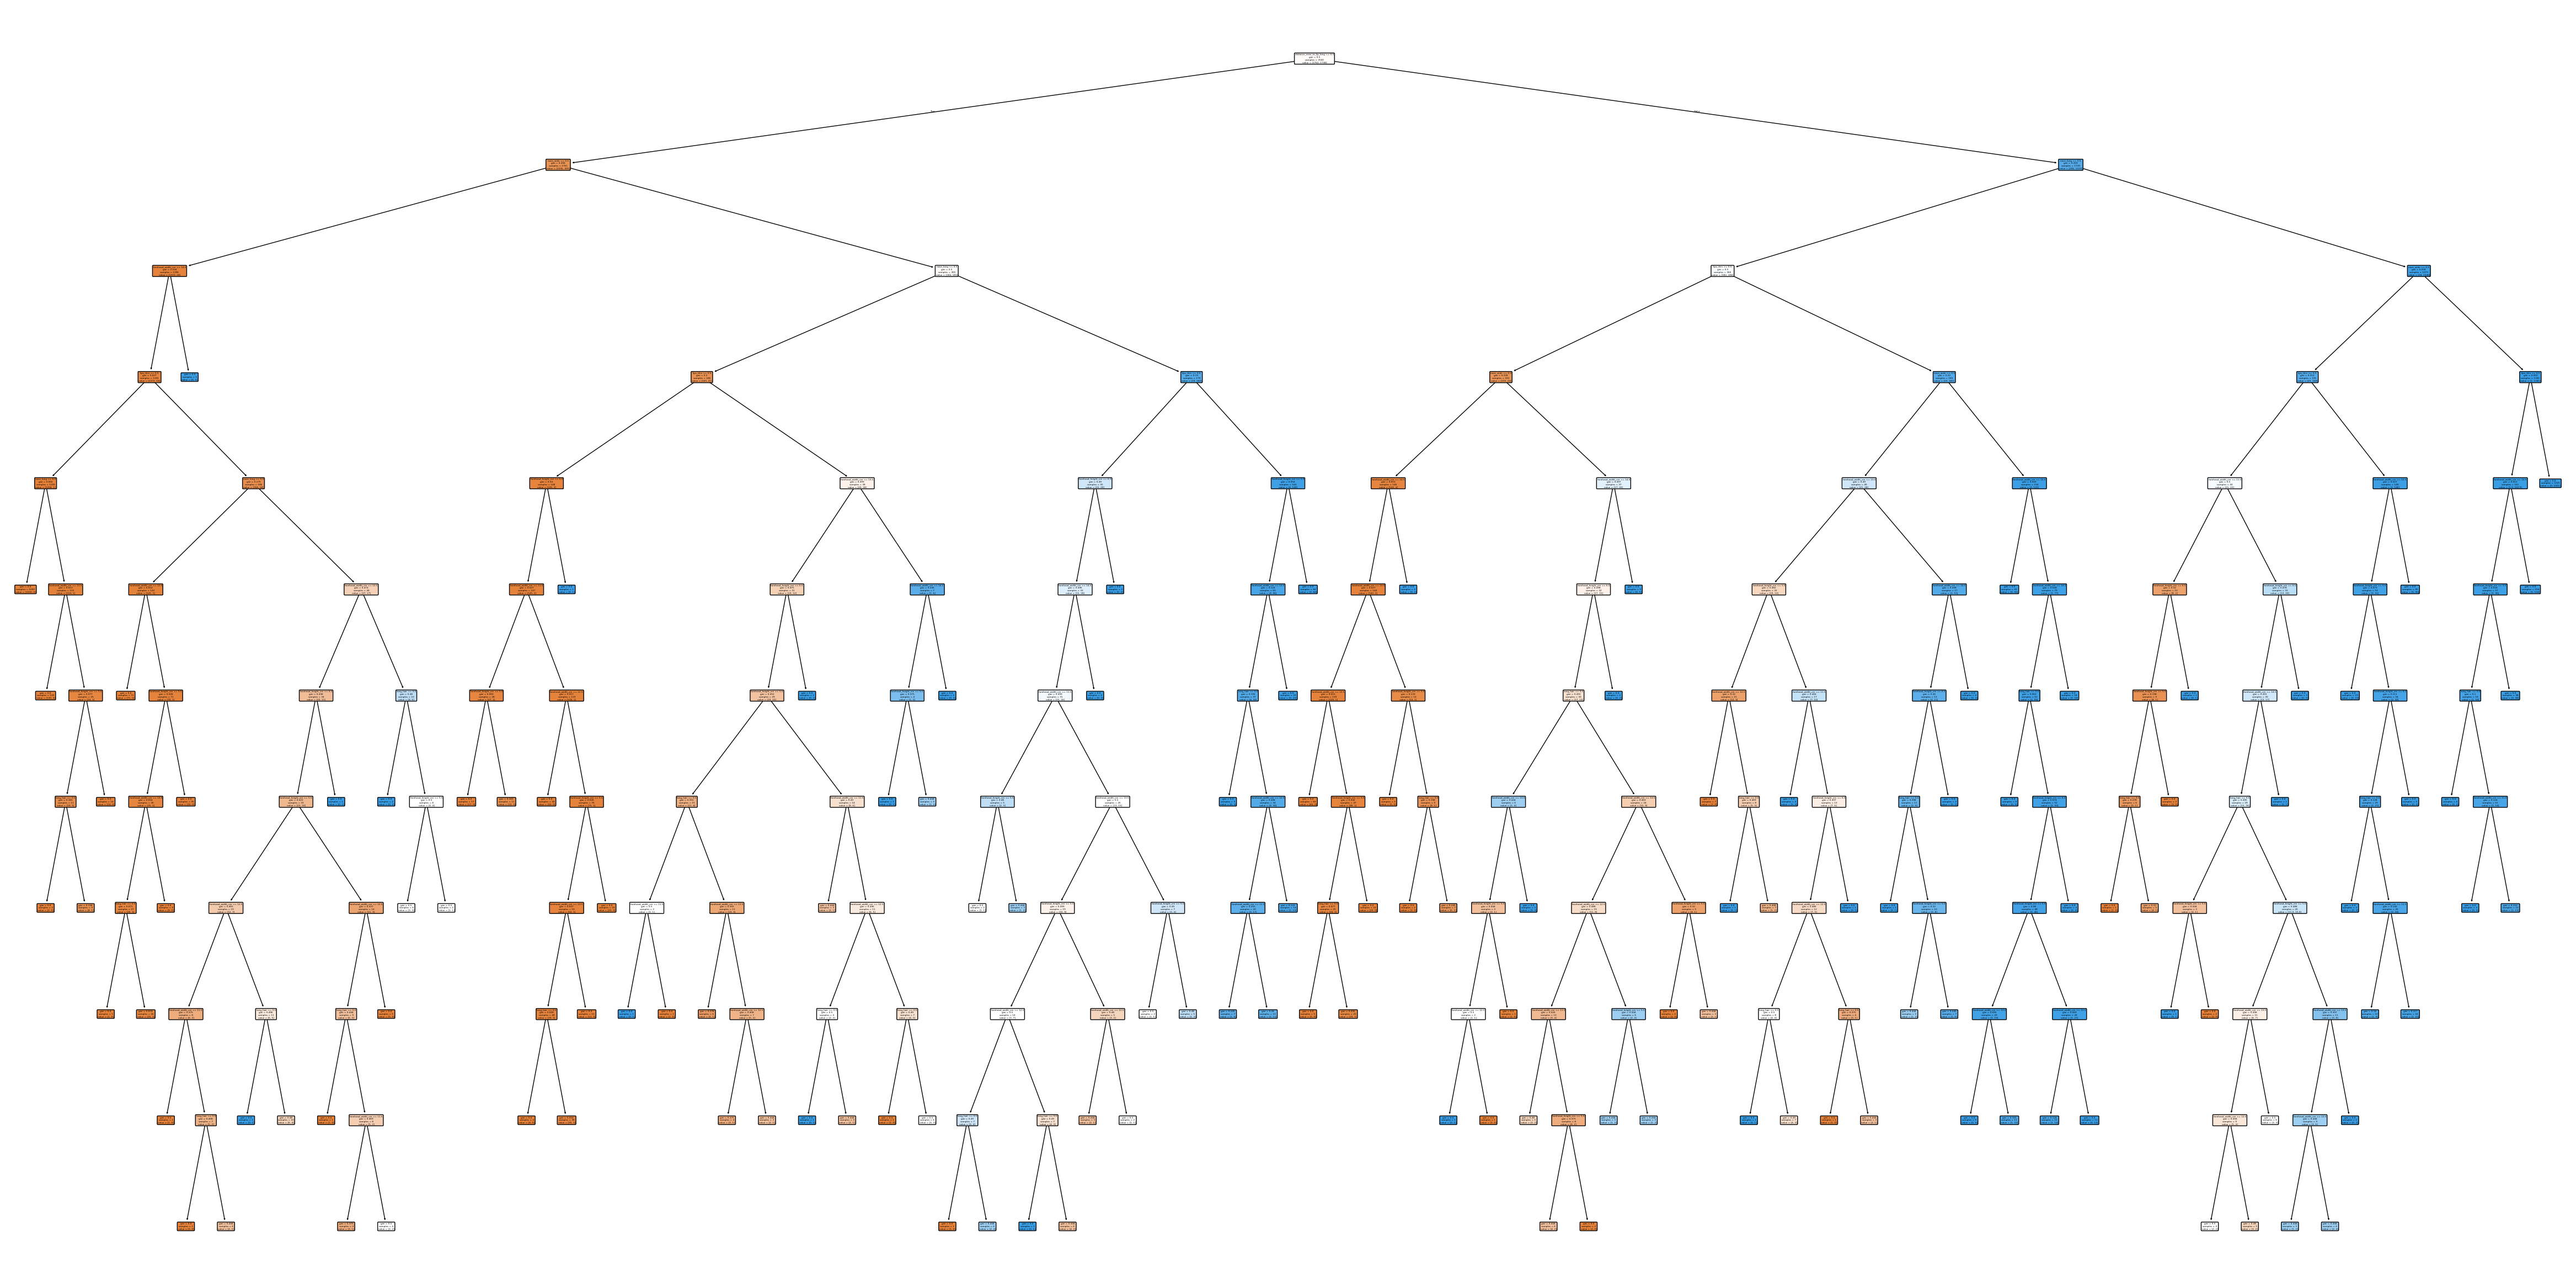

In [108]:
from sklearn import tree
print('Plotting Decision Tree dt (criterion=gini)')
plt.figure(figsize=(60,30))
tree.plot_tree(dt,feature_names=xtrain.columns,rounded=True,filled=True)
plt.show()

Plotting Decision Tree dt2 (criterion=entropy)


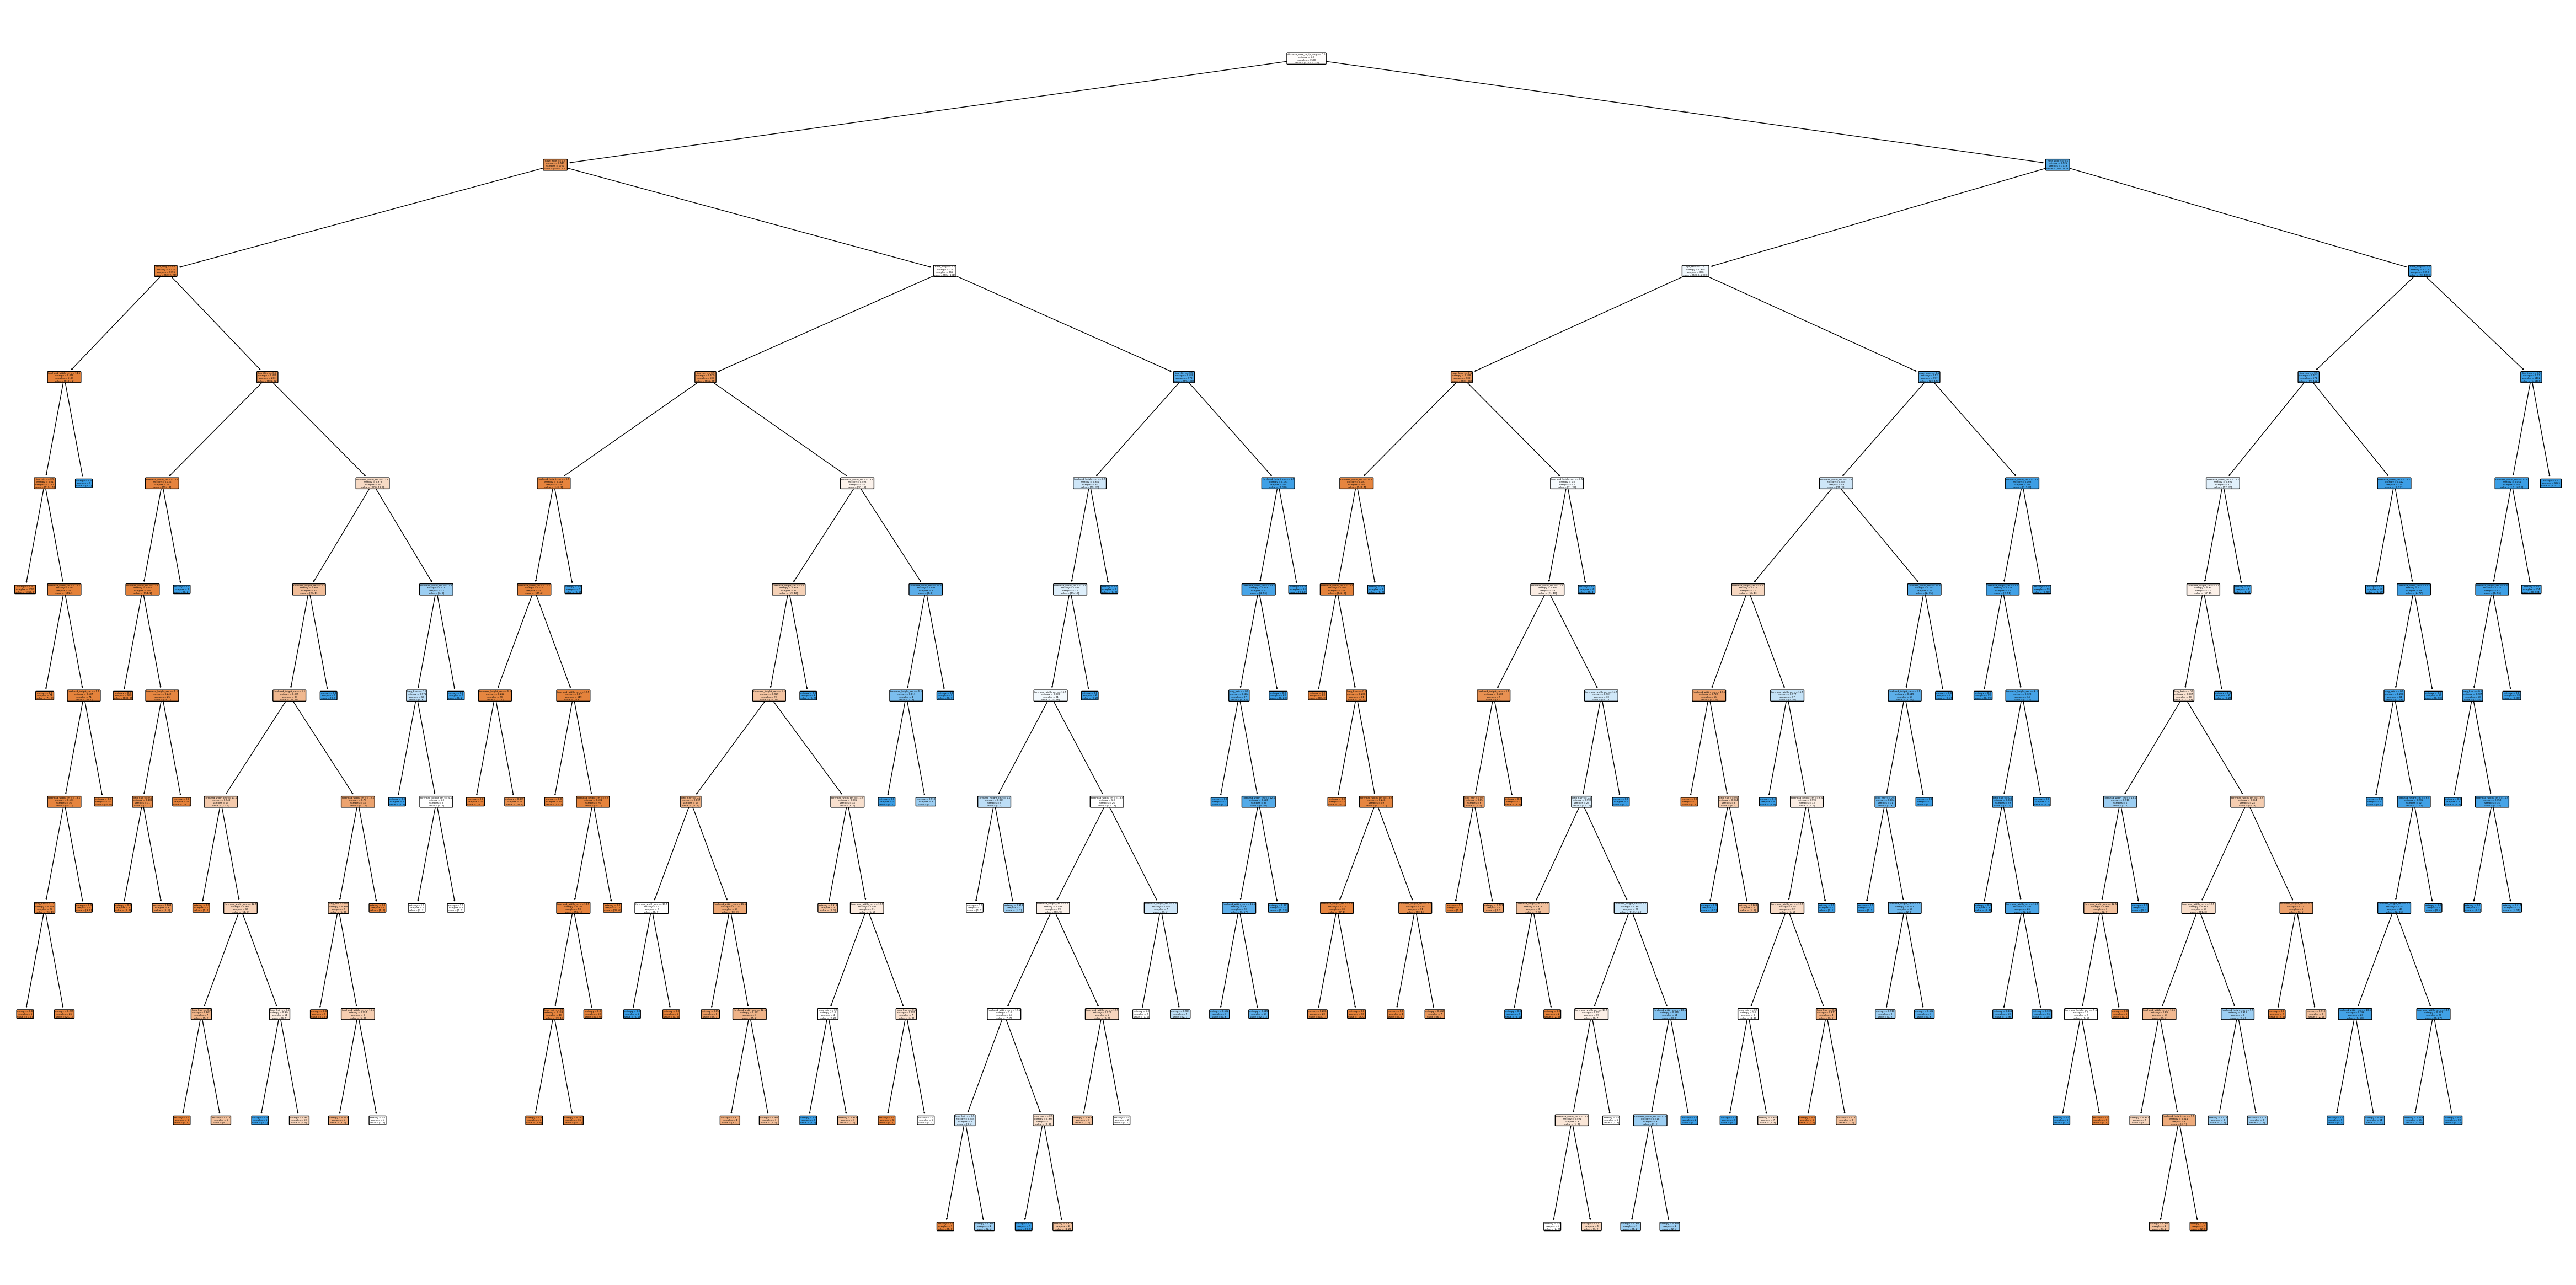

In [109]:
print('Plotting Decision Tree dt2 (criterion=entropy)')
plt.figure(figsize=(60,30))
tree.plot_tree(dt2,feature_names=xtrain.columns,rounded=True,filled=True)
plt.show()

## 5.5 Bagging Algorithms

### 5.5.1 Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)
ypred_rf = rf.predict(xtest)

print('Training accuracy:',rf.score(xtrain,ytrain))
print('Test accuracy:',rf.score(xtest,ytest))
print('Model accuracy:',accuracy_score(ytest,ypred_rf))

Training accuracy: 0.9788571428571429
Test accuracy: 0.9633577614923384
Model accuracy: 0.9633577614923384


In [113]:
#Trying a random forest with criterion as entropy. You can always change any of the hyperparameters you want
rf2 = RandomForestClassifier(criterion='entropy',random_state=42)
rf2.fit(xtrain,ytrain)
ypred_rf2 = rf2.predict(xtest)

print('Training accuracy:',rf2.score(xtrain,ytrain))
print('Test accuracy:',rf2.score(xtest,ytest))
print('Model accuracy:',accuracy_score(ytest,ypred_rf2))

Training accuracy: 0.9788571428571429
Test accuracy: 0.9613590939373751
Model accuracy: 0.9613590939373751


Entropy-based random forest seems to have lower accuracy than the Gini-based random forest.

## 5.6 Boosting Algorithms

### 5.6.1 AdaBoost Classifier

In [117]:
from sklearn.ensemble import AdaBoostClassifier
a = AdaBoostClassifier(random_state=42)
a.fit(xtrain,ytrain)
ypred_adaboost = a.predict(xtest)

print('Training accuracy:',a.score(xtrain,ytrain))
print('Test accuracy:',a.score(xtest,ytest))
print('Model accuracy:',accuracy_score(ytest,ypred_adaboost))

Training accuracy: 0.9714285714285714
Test accuracy: 0.9640239840106596
Model accuracy: 0.9640239840106596


This is a high accuracy score.

### 5.6.2 GradientBoosting Classifier

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(xtrain,ytrain)
ypred_gradboost = gb.predict(xtest)

print('Training accuracy:',gb.score(xtrain,ytrain))
print('Test accuracy:',gb.score(xtest,ytest))
print('Model accuracy:',accuracy_score(ytest,ypred_gradboost))

Training accuracy: 0.9737142857142858
Test accuracy: 0.9640239840106596
Model accuracy: 0.9640239840106596


This is the same accuracy score as the AdaBoost Classifier

### 5.6.3 XGBoost

In [123]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(xtrain,ytrain)
ypred_xgboost = xgb.predict(xtest)

print('Training accuracy:',xgb.score(xtrain,ytrain))
print('Test accuracy:',xgb.score(xtest,ytest))
print('Model accuracy:',accuracy_score(ytest,ypred_xgboost))

Training accuracy: 0.9788571428571429
Test accuracy: 0.9613590939373751
Model accuracy: 0.9613590939373751


This accuracy is slightly lower, which isn't usually the case with XGBoost. This boosting algorithm is the most preferred one in case of supervised machine learning since this algirithm has low bias and low variance. 

It seems like the original **Logit model** and the **Logistic Regression** models are those that have a high accuracy for this dataset. 

# 6. Metrics

We can use several accuracy metrics to determine the best model. I am choosing to look at the following metrics for each model:

- Confusion Matrix (correctly classified and misclassified)
- Accuracy
- F1 Score

## 6.1 Confusion Matrix

For a two-class classification problem, a confusion matrix is a 2x2 matrix. Let us take the confusion matrix for our base model. 

In [129]:
print(confusion_matrix(yctest,ycpred))

[[714  25]
 [ 27 735]]


Let us understand these values:
- 714 - Number of rows where the **outcome of gender was 0** and the model **correctly predicted 0**
- 25 - Number of rows where the **outcome of gender was 0** and the model **incorrectly predicted 1**
- 27 - Number of rows where the **outcome of gender was 1** and the model **incorrectly predicted 0**
- 735 - Number of rows where the **outcome of gender was 1** and the model **correctly predicted 1**

These values are given names like True Negative, False Positive, False Negative, and True Positive, generally. 

**What we want from the confusion matrix**:
- Number of records correctly classified and incorrectly classified
- Accuracy
- F1 score

There are other metrics called sensitivity, specificity, precision, etc. 

## 6.2 Accuracy 

Accuracy can be calculated from the confusion matrix as the sum of correctly classified records divided by the total. In code, we have already generated accuracy scores of all the models we built.

## 6.3 F1 Score

F1 score is defined as (2*(Precision+Recall))/(Precision + Recall). Also derived from the confusion matrix. 

## 6.4 User-Defined Function for Accuracy Metrics

Below is a user-defined function I have devised to calculate the metrics I want for all the models. You can add more metrics and personalize this for your use. 

In [137]:
#User defined function for accuracy metrics

#This is a dataframe within which we are going to append the scores of each model
score_card = pd.DataFrame(columns=['Model Name','Train Accuracy Score', 'Test Accuracy Score',
                                   'f1-weighted'])

def classificationAccuracyMetrics(modelname, model, xtrain, xtest, ytrain, ytest):
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)
    global score_card
    
    train_accuracy = accuracy_score(ytrain, y_pred_train)
    test_accuracy = accuracy_score(ytest, y_pred_test)
    
    #Note that here I'm using the average as 'weighted' for f1_score.
    #This is generally kept as 'binary' by default but using weighted will be preferred
    #since we have random forest models and boosting models to evaluate
    test_f1_score = f1_score(ytest, y_pred_test,average='weighted')
    
    new_row = pd.DataFrame({'Model Name':[modelname],
                            'Train Accuracy Score': [train_accuracy],
                            'Test Accuracy Score': [test_accuracy],
                            'f1-weighted': [test_f1_score]})
    
    score_card = pd.concat([score_card, new_row],ignore_index=True)

    #Sorting the entries in the score_card by the Test Accuracy score (descending order)
    #and resetting the index so it looks clean when the score_card is returned
    score_card = score_card.sort_values(by='Test Accuracy Score',ascending=False,ignore_index=True)


    return score_card

We will try and use this function now.

I have not included the Logit model in this scorecard, since it is a statistical model and I've written this function only for models built using sklearn.

In [139]:
classificationAccuracyMetrics('Logistic Regression',logistic_model,xtrain,xtest,ytrain,ytest)

,Model Name,Train Accuracy Score,Test Accuracy Score,f1-weighted
0,Logistic Regression,0.969429,0.965356,0.965357


In [140]:
#Remember to pass scaled data when using KNN
classificationAccuracyMetrics('KNN',knn_model,xtrain_sc,xtest_sc,ytrain,ytest)

,Model Name,Train Accuracy Score,Test Accuracy Score,f1-weighted
0,Logistic Regression,0.969429,0.965356,0.965357
1,KNN,0.973429,0.959360,0.959363


In [141]:
classificationAccuracyMetrics('Decision Tree (gini)',dt,xtrain,xtest,ytrain,ytest)

,Model Name,Train Accuracy Score,Test Accuracy Score,f1-weighted
0,Logistic Regression,0.969429,0.965356,0.965357
1,Decision Tree (gini),0.978857,0.960027,0.960027
2,KNN,0.973429,0.959360,0.959363


In [142]:
classificationAccuracyMetrics('Decision Tree (entropy)',dt2,xtrain,xtest,ytrain,ytest)

,Model Name,Train Accuracy Score,Test Accuracy Score,f1-weighted
0,Logistic Regression,0.969429,0.965356,0.965357
1,Decision Tree (gini),0.978857,0.960027,0.960027
2,Decision Tree (entropy),0.978857,0.960027,0.960027
3,KNN,0.973429,0.959360,0.959363


In [143]:
classificationAccuracyMetrics('Random Forest (gini)',rf,xtrain,xtest,ytrain,ytest)

,Model Name,Train Accuracy Score,Test Accuracy Score,f1-weighted
0,Logistic Regression,0.969429,0.965356,0.965357
1,Random Forest (gini),0.978857,0.963358,0.963359
2,Decision Tree (gini),0.978857,0.960027,0.960027
3,Decision Tree (entropy),0.978857,0.960027,0.960027
4,KNN,0.973429,0.959360,0.959363


In [144]:
classificationAccuracyMetrics('Random Forest (entropy)',rf2,xtrain,xtest,ytrain,ytest)

,Model Name,Train Accuracy Score,Test Accuracy Score,f1-weighted
0,Logistic Regression,0.969429,0.965356,0.965357
1,Random Forest (gini),0.978857,0.963358,0.963359
2,Random Forest (entropy),0.978857,0.961359,0.961360
3,Decision Tree (gini),0.978857,0.960027,0.960027
4,Decision Tree (entropy),0.978857,0.960027,0.960027
5,KNN,0.973429,0.959360,0.959363


In [145]:
classificationAccuracyMetrics('AdaBoost Classifier',a,xtrain,xtest,ytrain,ytest)

,Model Name,Train Accuracy Score,Test Accuracy Score,f1-weighted
0,Logistic Regression,0.969429,0.965356,0.965357
1,AdaBoost Classifier,0.971429,0.964024,0.964018
2,Random Forest (gini),0.978857,0.963358,0.963359
3,Random Forest (entropy),0.978857,0.961359,0.961360
4,Decision Tree (gini),0.978857,0.960027,0.960027
5,Decision Tree (entropy),0.978857,0.960027,0.960027
6,KNN,0.973429,0.959360,0.959363


In [146]:
classificationAccuracyMetrics('Gradient Boost Classifier',gb,xtrain,xtest,ytrain,ytest)

,Model Name,Train Accuracy Score,Test Accuracy Score,f1-weighted
0,Logistic Regression,0.969429,0.965356,0.965357
1,AdaBoost Classifier,0.971429,0.964024,0.964018
2,Gradient Boost Classifier,0.973714,0.964024,0.964026
3,Random Forest (gini),0.978857,0.963358,0.963359
4,Random Forest (entropy),0.978857,0.961359,0.961360
5,Decision Tree (gini),0.978857,0.960027,0.960027
6,Decision Tree (entropy),0.978857,0.960027,0.960027
7,KNN,0.973429,0.959360,0.959363


In [147]:
classificationAccuracyMetrics('XGBoost Classifier',xgb,xtrain,xtest,ytrain,ytest)

,Model Name,Train Accuracy Score,Test Accuracy Score,f1-weighted
0,Logistic Regression,0.969429,0.965356,0.965357
1,AdaBoost Classifier,0.971429,0.964024,0.964018
2,Gradient Boost Classifier,0.973714,0.964024,0.964026
3,Random Forest (gini),0.978857,0.963358,0.963359
4,Random Forest (entropy),0.978857,0.961359,0.961360
5,XGBoost Classifier,0.978857,0.961359,0.961361
6,Decision Tree (gini),0.978857,0.960027,0.960027
7,Decision Tree (entropy),0.978857,0.960027,0.960027
8,KNN,0.973429,0.959360,0.959363


From this table, logistic regression looks to be the best out of the 9 models created.

## 6.5 User-Defined function for confusion matrix

Through this user-defined function, I'm going to see which model has less incorrectly-classified instances.

In [151]:
#This is the confusion matrix for the logistic regression model
print(confusion_matrix(ytest,ypred_logistic))

[[714  25]
 [ 27 735]]


In [152]:
#User defined function for confusion matrix

confusionMatrix_scores = pd.DataFrame(columns=['Model Name',
                                               'Correctly Classified (0)',
                                              'Misclassified (actual=1)',
                                              'Misclassified (actual=0)',
                                              'Correctly Classified (1)'])

def confusionMatrixMetrics(modelname, model,xtrain,xtest,ytrain,ytest):
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)
    global confusionMatrix_scores

    #An understanding of a 2x2 confusion matrix will help you understand this function and code
    cm = confusion_matrix(ytest, y_pred_test)
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    
    new_row = pd.DataFrame({'Model Name':[modelname],
                            'Correctly Classified (0)':[tn],
                            'Misclassified (actual=1)':[fp],
                            'Misclassified (actual=0)':[fn],
                            'Correctly Classified (1)':[tp]})
    
    confusionMatrix_scores = pd.concat([confusionMatrix_scores, new_row],ignore_index=True)

    #Sorting the entries in the confusionMatrix_scores by values of the Misclassified columns (in ascending order)
    #and resetting the index so it looks clean when the score_card is returned
    
    confusionMatrix_scores = confusionMatrix_scores.sort_values(
        by=['Misclassified (actual=1)','Misclassified (actual=0)'],
        ascending=[True,True],
        ignore_index=True)
    
    return confusionMatrix_scores

Let us see if this works

In [154]:
confusionMatrixMetrics('Logistic Regression',logistic_model,xtrain,xtest,ytrain,ytest)

,Model Name,Correctly Classified (0),Misclassified (actual=1),Misclassified (actual=0),Correctly Classified (1)
0,Logistic Regression,714,25,27,735


In [155]:
confusionMatrixMetrics('KNN',knn_model,xtrain_sc,xtest_sc,ytrain,ytest)

,Model Name,Correctly Classified (0),Misclassified (actual=1),Misclassified (actual=0),Correctly Classified (1)
0,KNN,716,23,38,724
1,Logistic Regression,714,25,27,735


In [156]:
confusionMatrixMetrics('Decision Tree',dt,xtrain,xtest,ytrain,ytest)

,Model Name,Correctly Classified (0),Misclassified (actual=1),Misclassified (actual=0),Correctly Classified (1)
0,Decision Tree,720,19,41,721
1,KNN,716,23,38,724
2,Logistic Regression,714,25,27,735


In [157]:
confusionMatrixMetrics('Decision Tree (entropy)',dt2,xtrain,xtest,ytrain,ytest)

,Model Name,Correctly Classified (0),Misclassified (actual=1),Misclassified (actual=0),Correctly Classified (1)
0,Decision Tree,720,19,41,721
1,Decision Tree (entropy),720,19,41,721
2,KNN,716,23,38,724
3,Logistic Regression,714,25,27,735


In [158]:
confusionMatrixMetrics('Random Forest (gini)',rf,xtrain,xtest,ytrain,ytest)

,Model Name,Correctly Classified (0),Misclassified (actual=1),Misclassified (actual=0),Correctly Classified (1)
0,Random Forest (gini),720,19,36,726
1,Decision Tree,720,19,41,721
2,Decision Tree (entropy),720,19,41,721
3,KNN,716,23,38,724
4,Logistic Regression,714,25,27,735


In [159]:
confusionMatrixMetrics('Random Forest (entropy)',rf2,xtrain,xtest,ytrain,ytest)

,Model Name,Correctly Classified (0),Misclassified (actual=1),Misclassified (actual=0),Correctly Classified (1)
0,Random Forest (gini),720,19,36,726
1,Random Forest (entropy),720,19,39,723
2,Decision Tree,720,19,41,721
3,Decision Tree (entropy),720,19,41,721
4,KNN,716,23,38,724
5,Logistic Regression,714,25,27,735


In [160]:
confusionMatrixMetrics('AdaBoost Classifier',a,xtrain,xtest,ytrain,ytest)

,Model Name,Correctly Classified (0),Misclassified (actual=1),Misclassified (actual=0),Correctly Classified (1)
0,AdaBoost Classifier,729,10,44,718
1,Random Forest (gini),720,19,36,726
2,Random Forest (entropy),720,19,39,723
3,Decision Tree,720,19,41,721
4,Decision Tree (entropy),720,19,41,721
5,KNN,716,23,38,724
6,Logistic Regression,714,25,27,735


In [161]:
confusionMatrixMetrics('Gradient Boosting Classifier',gb,xtrain,xtest,ytrain,ytest)

,Model Name,Correctly Classified (0),Misclassified (actual=1),Misclassified (actual=0),Correctly Classified (1)
0,AdaBoost Classifier,729,10,44,718
1,Random Forest (gini),720,19,36,726
2,Random Forest (entropy),720,19,39,723
3,Decision Tree,720,19,41,721
4,Decision Tree (entropy),720,19,41,721
5,Gradient Boosting Classifier,717,22,32,730
6,KNN,716,23,38,724
7,Logistic Regression,714,25,27,735


In [162]:
confusionMatrixMetrics('XGBoost Classifier',xgb,xtrain,xtest,ytrain,ytest)

,Model Name,Correctly Classified (0),Misclassified (actual=1),Misclassified (actual=0),Correctly Classified (1)
0,AdaBoost Classifier,729,10,44,718
1,Random Forest (gini),720,19,36,726
2,Random Forest (entropy),720,19,39,723
3,Decision Tree,720,19,41,721
4,Decision Tree (entropy),720,19,41,721
5,XGBoost Classifier,718,21,37,725
6,Gradient Boosting Classifier,717,22,32,730
7,KNN,716,23,38,724
8,Logistic Regression,714,25,27,735


This is interesting.

* **AdaBoost** seems to have the least number of misclassifications out of all the 9 models
* **Logistic Regression**, which was the model that returned the highest accuracy score, actually has the most number of misclassified data points.

However, if we try to derive the accuracy from these numbers, Logistic Regression's accuracy score is higher than all the models.

This proves that, for this data, Logistic is the best model, and we shouldn't be thrown off just because another model has misclassified fewer data points.

# 7. Important Features

Our base model returned some quasi-separation and the p-values from the logit model were not helpful in ascertaining the columns that were the most important in predicting our target variable. 

However, decision trees and random forests have a feature_importances_ attribute that will give us the most important features that aid in predicting gender. 

If you remember the score_card from the user-defined function for accuracy metrics, the random forest and decision tree that used the gini criterion for splitting had higher accuracy than the entropy methods. I will be using those models to derive important features.

## 7.1 Important Features (Decision Tree)

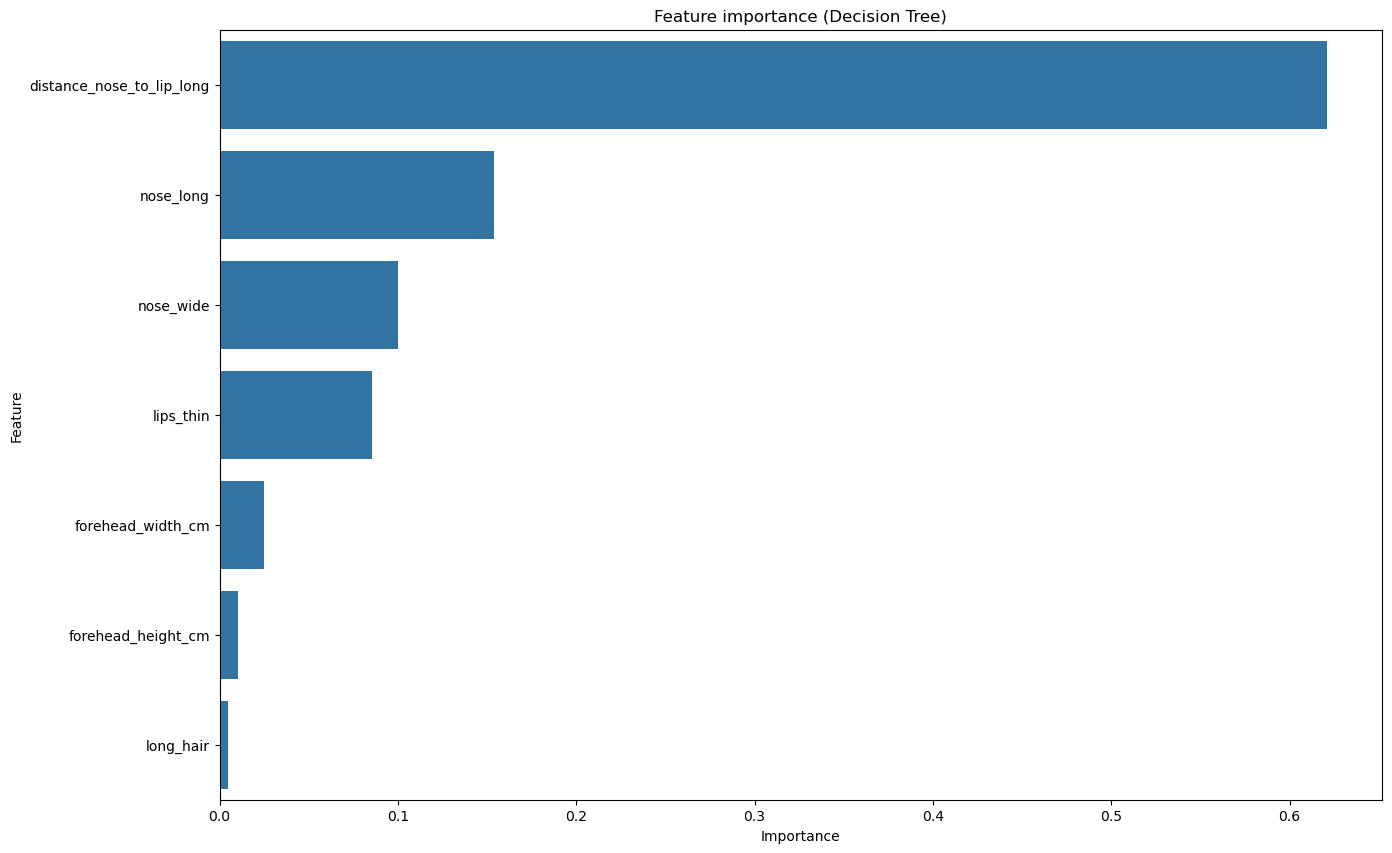

In [167]:
dt_feature = pd.DataFrame()
dt_feature['Feature'] = xtrain.columns
dt_feature['Importance'] = dt.feature_importances_
dt_feature = dt_feature.sort_values('Importance',ascending=False)
sns.barplot(data=dt_feature,x='Importance',y='Feature')
plt.title('Feature importance (Decision Tree)')
plt.show()

The column 'distance_nose_to_lip_long' seems to be the deciding factor, according to this decision tree.

## 7.2 Important Features (Random Forest)

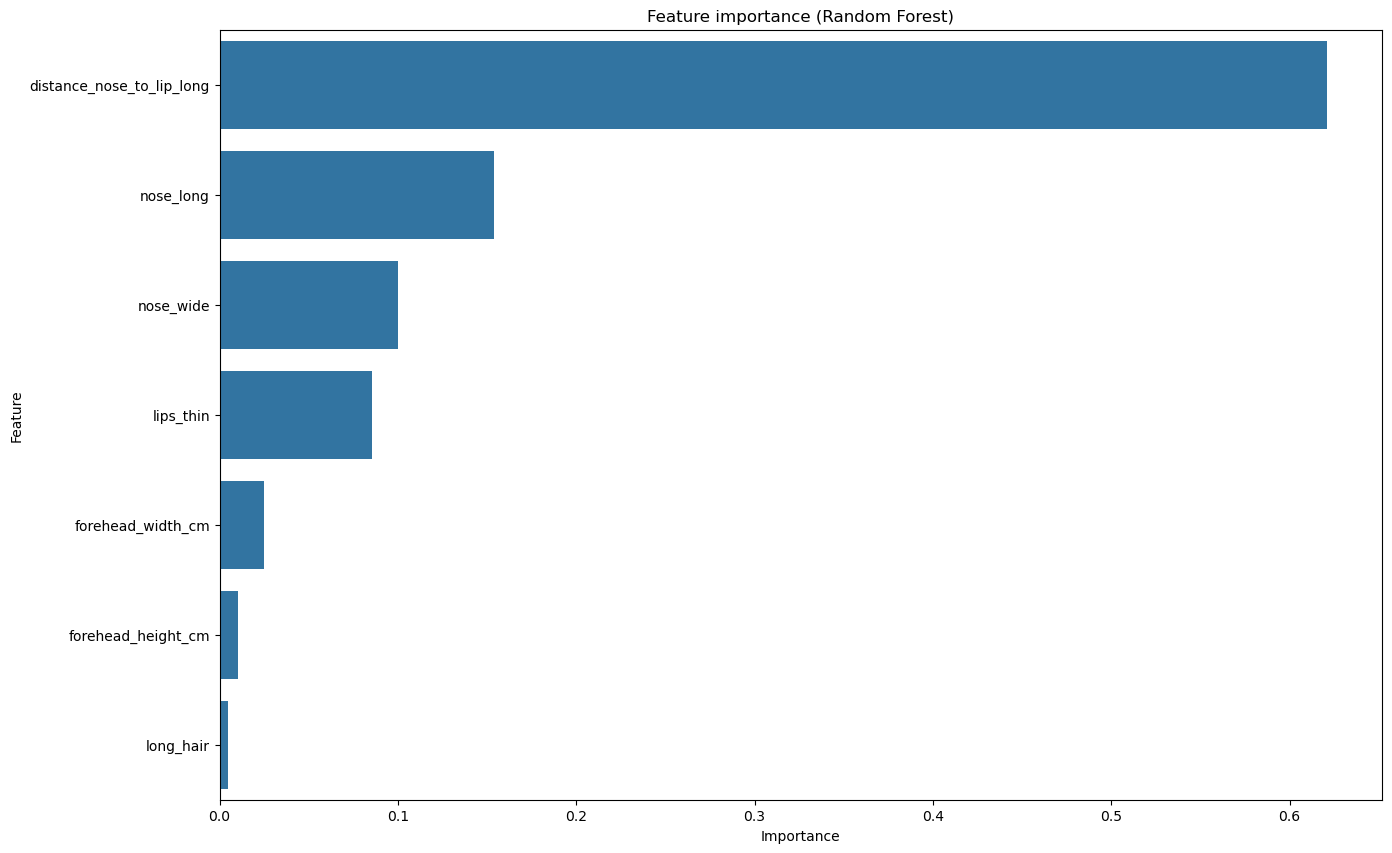

In [170]:
rf_feature = pd.DataFrame()
rf_feature['Feature'] = xtrain.columns
rf_feature['Importance'] = rf.feature_importances_
rf_feature = dt_feature.sort_values('Importance',ascending=False)
sns.barplot(data=rf_feature,x='Importance',y='Feature')
plt.title('Feature importance (Random Forest)')
plt.show()

The random forest is also giving the same conclusion.

# 8. Conclusion

* From a dataset used to predict gender of the person **(0 - Female, 1 - Male)** based on facial features and measurements, we were able to build **1 Base model (Logit)** and **9 other models** (albeit not pruned or tuned with custom values for hyperparameters)
* Out of the 10 models, we ascertained that the **Logistic Regression model returned the highest accuracy**
* It is also to be noted that the base model returned the same levels of accuracy as the Logistic Regression Model
* The accuracy of this model was nearly 97 percent
* It is to be noted that I haven't tried using the Naive-Bayes Classifier
* Also that this dataset is from Kaggle and I do not own it in any way
* This is also a very clean dataset, so I didn't have much EDA work to do, and the nature of the dataset and the features itself are not exactly scientifically accurate and this project was just to replicate learnings

<h1><center> End of Project </center></h1>